In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [29]:
# import
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from matplotlib import pyplot as plt

In [30]:
# load training and test data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv').to_numpy()
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv').to_numpy()

In [31]:
X_train = train[:,1:]
Y_train = train[:,0]
X_test = test

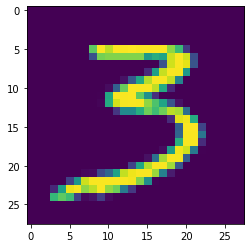

In [69]:
# display training data
train_index = 25
plt.imshow(np.reshape(X_train[train_index], (28, 28)))

In [32]:
# normalize
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [33]:
# Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


In [34]:
def create_model(learning_rate):
    """Create and compile a deep neural net."""
    # Sequential model
    model = keras.models.Sequential()
    
    #model.add(Flatten(input_shape=(1, 784)))

    # Dense layers followed by dropout   
    model.add(Dense(units=512, input_shape=(784, ), activation='relu')) 
    model.add(Dropout(rate=0.5))
    model.add(Dense(units=256, activation='relu')) 
    model.add(Dropout(rate=0.5))
    

    # Output layer with 10 units
    model.add(Dense(units=10, activation='softmax'))     

    # Compile model with categorical cross-entropy loss
    model.compile(optimizer=keras.optimizers.Adam(lr=learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])

    return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 2s 65us/step - loss: 1.2561 - accuracy: 0.5913 - val_loss: 0.3705 - val_accuracy: 0.8896
Epoch 2/50
33600/33600 [==============================] - 2s 56us/step - loss: 0.4470 - accuracy: 0.8633 - val_loss: 0.2582 - val_accuracy: 0.9231
Epoch 3/50
33600/33600 [==============================] - 2s 56us/step - loss: 0.3051 - accuracy: 0.9101 - val_loss: 0.1997 - val_accuracy: 0.9385
Epoch 4/50
33600/33600 [==============================] - 2s 56us/step - loss: 0.2393 - accuracy: 0.9280 - val_loss: 0.1640 - val_accuracy: 0.9508
Epoch 5/50
33600/33600 [==============================] - 2s 55us/step - loss: 0.1980 - accuracy: 0.9397 - val_loss: 0.1422 - val_accuracy: 0.9571
Epoch 6/50
33600/33600 [==============================] - 2s 56us/step - loss: 0.1727 - accuracy: 0.9477 - val_loss: 0.1265 - val_accuracy: 0.9620
Epoch 7/50
33600/33600 [==============================] - 2s 55us/ste

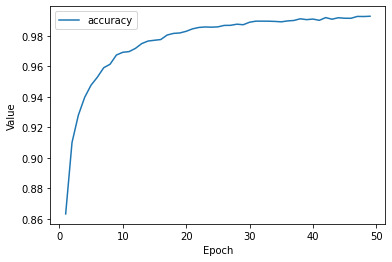

In [35]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, X_train_normalized, Y_train, 
                           epochs, batch_size, validation_split)

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

In [70]:
# predict first 10 entries of training set
np.argmax(my_model.predict(X_train[0:10,:]), axis=1)

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

In [53]:
# actual labels
Y_train[0:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

In [72]:
# Predict on test data
predictions = np.argmax(my_model.predict(X_test), axis=1)

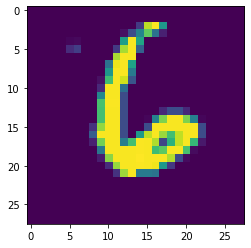

In [84]:
# display test set
test_index = 300
plt.imshow(np.reshape(X_test[test_index], (28, 28)))

In [85]:
# display prediction
predictions[test_index]

6

In [97]:
# write predictions to csv
example_indices = np.reshape(np.arange(1,predictions.size+1),(-1,1))
headers = np.array([['ImageId', 'Label']])
predictions_table = np.concatenate((headers, np.concatenate((example_indices, np.reshape(predictions, (-1,1))), axis=1)), axis=0)

np.savetxt('predictions.csv', predictions_table, delimiter=',', fmt='%s')